# 資料視覺化

MIT License. Copyright (c) 2021 CAVEDU

## 課程大綱

+ ### 檔案資料讀取/儲存
    + 文字檔案(上週內容)
    + 圖片(補充內容)
    + 表格資料

###  1. 各種資料格式
1. CSV 資料格式讀寫
2. JSON 資料格式讀寫
3. YAML 資料格式讀寫
4. XML 資料格式讀寫  
5. HTML 資料格式讀寫

### 2. pandas 資料呈現

用 pandas 載入各種資料格式，下週會深入討論 dataframe
+ ### matplotlib資料視覺化

==============

## 1. 讀取並顯示圖片(補充內容)

使用IPython當中的Image來顯示出圖片

+ 試試看將圖片路徑改成你電腦上的其他圖片
+ 後續會改用其他方法來處理圖片，各有所長
+ 注意：IPython 只能用於 jupyter notebook，如果要產生獨立視窗來 顯示圖片需使用matplotlib

In [1]:
from IPython.display import Image
#絕對路徑
#Image(filename='C:/Users/USER/Downloads/cat.png')

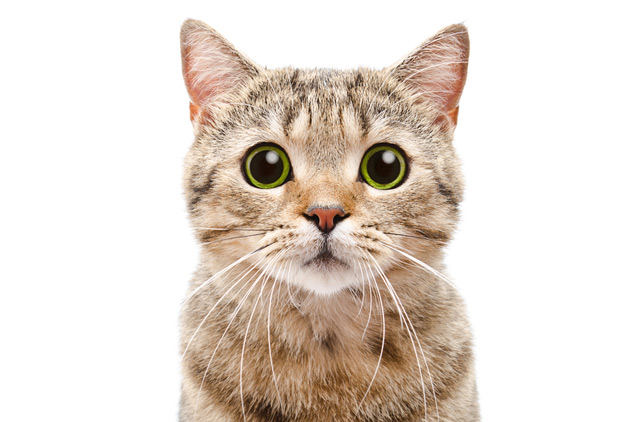

In [4]:
#相對路徑，跟程式同資料夾
Image(filename='cat.jpg')
Image('cat.jpg', width=400, height=200)

換另一個函式庫來顯示影像， skimage (scikit-image, 用於Python的科學資料處理套件，https://scikit-image.org/)

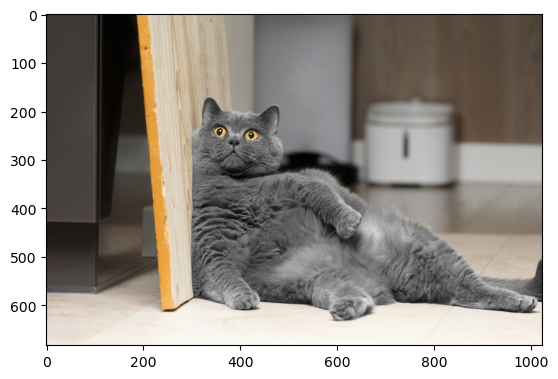

In [5]:
# import os
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

#img = io.imread('cat.png')
img = io.imread('fafa.JPG')

plt.imshow(img)

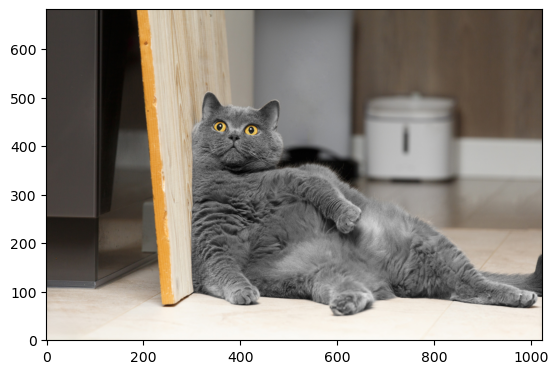

In [6]:
img_mirror = plt.imshow(np.flipud(plt.imread('fafa.JPG')), origin = 'lower')
plt.show(img_mirror)

####  改用 [scikit-image](https://scikit-image.org/) 來載入圖片 (scikit 是資料科學用的 python套件)

*   延伸閱讀：https://www.cnblogs.com/denny402/p/5122594.html



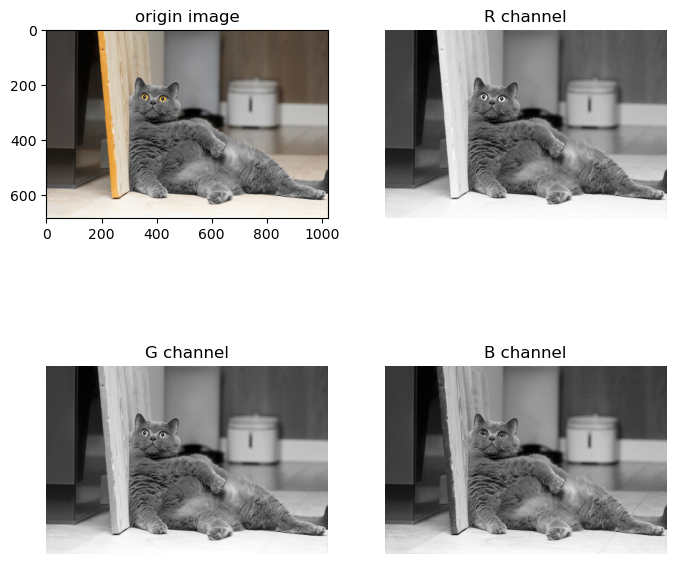

In [7]:
# from skimage import data
import matplotlib.pyplot as plt

#img = data.astronaut() #函式庫預設的太空人圖片
img = io.imread('fafa.JPG')

plt.figure(num='fafa',figsize=(8,8))  #建立fafa視窗，並設定視窗大小

plt.subplot(2,2,1)     #視窗分為 2 x 2，可顯示四張圖片，現在是第一張
plt.title('origin image')   #第一張圖片標題
plt.imshow(img)      #繪製第一張圖

plt.subplot(2,2,2)     #第二張子圖
plt.title('R channel')   #第二張圖片標題
plt.imshow(img[:,:,0],plt.cm.gray)      #繪製第二張圖，取R(紅色)通道值，灰階，顏色愈深代表此處紅色愈強
plt.axis('off')     #不顯示坐標軸格線

plt.subplot(2,2,3)     #第三張子圖
plt.title('G channel')   #第三張圖片標題
plt.imshow(img[:,:,1],plt.cm.gray)      #繪製第三張圖，取G(綠色)通道值，灰階，顏色愈深代表此處綠色愈強
plt.axis('off')     #不顯示坐標軸格線

plt.subplot(2,2,4)     #第四張子圖
plt.title('B channel')   #第四張圖片標題
plt.imshow(img[:,:,2],plt.cm.gray)      #繪製第四張圖，取B(藍色)通道值，灰階，顏色愈深代表此處藍色愈強
plt.axis('off')     #不顯示坐標軸格線

plt.show()   #顯示整個視窗

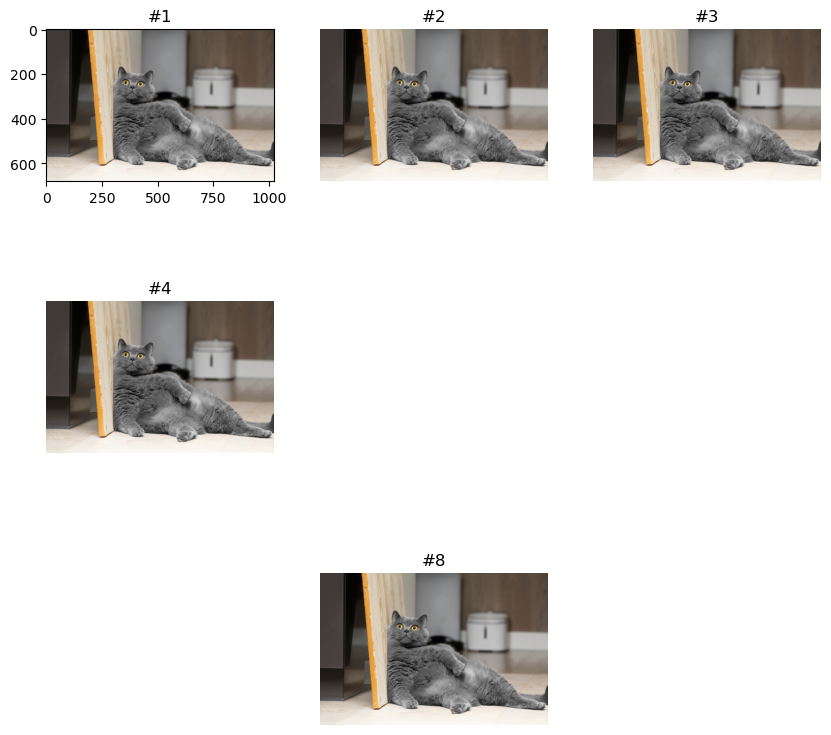

In [8]:
# from skimage import data
import matplotlib.pyplot as plt

#img = data.astronaut() #函式庫預設的太空人圖片
img = io.imread('fafa.JPG')

plt.figure(num='fafa',figsize=(10,10))  #建立fafa視窗，並設定視窗大小

plt.subplot(3,3,1)     #視窗分為 3 x 3
plt.title('#1')   #第一張圖片標題
plt.imshow(img)      #繪製第一張圖

plt.subplot(3,3,2)
plt.title('#2')
plt.imshow(img)
plt.axis('off')

plt.subplot(3,3,3)
plt.title('#3')
plt.imshow(img)
plt.axis('off')

plt.subplot(3,3,4)
plt.title('#4')
plt.imshow(img)
plt.axis('off')

plt.subplot(3,3,8)
plt.title('#8')
plt.imshow(img)
plt.axis('off')

plt.show()   #顯示整個視窗

========

##  結構化格式：csv, html, xml, json

*   這四種資料格式在進行資料爬蟲作業時相當常見，請參考新北政府開放資料平台(https://data.ntpc.gov.tw/)
*   除了 HTML 之外，其餘三種格式幾乎都可依循相同的模式來處理
*   不同的格式需搭配不同的解析語法，但流程差不多。

### CSV:
*   csv.writer
*   csv.reader

### JSON:
* import request
* requests.get(網址)
* json.loads
* 再根據欄位標籤名稱去取值，例如 data["PM2.5"]

### XML:
* import xml.etree.ElementTree as ET
* tree = ET.parse("網址或檔名")
* root = tree.getroot()
* 再根據標籤名稱去取值，例如row.find('sno')

### HTML:
* import beautifulsoup
* html = urlopen(網址)
* bsObj.find
* single_tr.findAll("th") 這類的語法


## CSV

### 1-1. 讀取 csv 表格資料


csv（Comma-Separated Values）是一種簡單的文字檔格式，以往都是用逗號(,)分隔不同欄位的資料，但現在已不限用逗號，可透過 delimiter 來指定用來分隔的符號。
  
使用提供的表格資料範例(TH_data.csv)來練習讀取表格資料吧！

注意: 建立csv檔案時，Enter鍵會產生多餘的空格
  
+ 試試看將excel檔案儲存成csv檔案並讀取
+ **注意 .csv 下載後會自動附加 .xlsx 副檔名，請用 Excel 另存成 .csv 即可**

In [9]:
# 匯入csv檔案函式庫
import csv

# 開啟csv檔案
with open('data.csv', newline='') as csvfile:

    # 讀取csv檔案內容
    rows = csv.reader(csvfile)

    # 以for迴圈輸出每一列
    for row in rows:
        print(row)

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [14]:
pip install --upgrade ipython jupyter

  Using cached traitlets-5.14.3-py3-none-any.whl.metadata (10 kB)
   ---------------------------------------- 0.0/612.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/612.4 kB ? eta -:--:--
    --------------------------------------- 10.2/612.4 kB ? eta -:--:--
   -- ------------------------------------ 41.0/612.4 kB 326.8 kB/s eta 0:00:02
   --------- ---------------------------- 153.6/612.4 kB 919.0 kB/s eta 0:00:01
   --------------- ------------------------ 235.5/612.4 kB 1.1 MB/s eta 0:00:01
   ------------------------- -------------- 389.1/612.4 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------  604.2/612.4 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 612.4/612.4 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/85.4 kB ? eta -:--:--
   ---------------------------------------- 85.4/85.4 kB 1.6 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.7.1
    Unins

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.4.3 requires ipython!=8.10.0,!=8.8.0,!=8.9.0,<9.0.0,>=7.31.1, but you have ipython 9.5.0 which is incompatible.
spyder-kernels 2.4.4 requires ipython!=8.10.0,!=8.11.0,!=8.12.0,!=8.12.1,!=8.8.0,!=8.9.0,<9,>=7.31.1; python_version >= "3", but you have ipython 9.5.0 which is incompatible.


In [19]:
%%file data.csv
#可用以下語法來產生簡單的 csv
"alpha 1", 100, -1.443
"beta 2", 12, -0.0934
"gamme 3a", 192, -0.6621
"delta 2a", 15, -4.515

Overwriting data.csv


In [21]:
import csv

with open("data.csv", "r", encoding="utf-8") as fp:
    r = csv.reader(fp)
    for row in r:
        print(row)


['#可用以下語法來產生簡單的 csv']
['alpha 1', ' 100', ' -1.443']
['beta 2', ' 12', ' -0.0934']
['gamme 3a', ' 192', ' -0.6621']
['delta 2a', ' 15', ' -4.515']


這樣會把資料內容當作字串 str 來處理，但也可以改的

In [24]:
import csv

data = []
with open("data.csv", "r", encoding="utf-8") as fp:
    r = csv.reader(fp)
    for row in r:
        # 跳過空行或缺欄位的行
        if len(row) < 3:
            continue  
        data.append([row[0], int(row[1]), float(row[2])])

print(data)


[['alpha 1', 100, -1.443], ['beta 2', 12, -0.0934], ['gamme 3a', 192, -0.6621], ['delta 2a', 15, -4.515]]


### 寫入 csv 資料

+ 可用 csv.writer來寫入 csv 檔案，開檔時需指定檔名與權限('w')
+ 如出現換行不正確可改用'wb'代表 write binary 二進位寫入
+ 兩種做法比較一下

In [25]:
# 先建立清單再一次寫入
data = [("編號", "身高", "體重"),('one', 1, 1.5), ('two', 2, 8.0)]
with open('out.csv', 'w') as fp:
    w = csv.writer(fp)
    w.writerows(data)

In [26]:
# 逐行寫入
with open('out.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter = ',')
    writer.writerow(['姓名', '身高', '體重'])
    writer.writerow(['曾阿吉', 171, 80])
    writer.writerow(['林曉鈴', 158, 55])

###  讀取本地 csv 資料
b  

請開啟 "ntpc_youbike.csv" 為新北市公共自行車資訊，欄位說明：(由google drive下載之後，使用 excel 另存為 .csv，否則無法讀取)

+ sno：站點代號
+ sna：場站名稱(中文)
+ tot：場站總停車格、
+ sbi：場站目前車輛數量
+ sarea：場站區域(中文)
+ mday：資料更新時間、
+ lat：緯度
+ lng：經度
+ ar：地址(中文)
+ sareaen：場站區域(英文)
+ snaen：場站名稱(英文)
+ aren：地址(英文)
+ bemp：空位數量
+ act：全站禁用狀態

In [28]:
import csv
with open('ntpc_youbike.csv','r',encoding = 'utf8') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        print(row[0]+" "+row[1]+" "+row[3]+" "+row[5]+" "+row[12])


﻿sno sna sbi mday bemp
1001 大鵬華城 16 2.01807E+13 22
1002 汐止火車站 20 2.01807E+13 36
1003 汐止區公所 12 2.01807E+13 33
1004 國泰綜合醫院 34 2.01807E+13 22
1005 裕隆公園 23 2.01807E+13 17
1006 捷運大坪林站(3號出口) 2 2.01807E+13 30
1007 汐科火車站(北) 31 2.01807E+13 3
1008 興華公園 12 2.01807E+13 28
1009 三重國民運動中心 5 2.01807E+13 62
1010 捷運三重站(3號出口) 0 2.01807E+13 34
1011 樟樹國小 26 2.01807E+13 22
1012 金龍國小 28 2.01807E+13 23
1013 白雲國小 14 2.01807E+13 32
1014 東勢宜興活動中心 18 2.01807E+13 29
1015 後港公園 13 2.01807E+13 27
1016 福營行政中心 31 2.01807E+13 11
1017 西盛公園 8 2.01807E+13 27
1018 忠誠里(北新路2段97巷) 0 2.01807E+13 40
1019 仁愛廣場 27 2.01807E+13 23
1020 重陽國小 30 2.01807E+13 12
1021 明志國中 10 2.01807E+13 40
1022 三重商工 21 2.01807E+13 42
1023 捷運新莊站(1號出口) 0 2.01807E+13 54
1024 原興廣場 16 2.01807E+13 36
1025 文化白雲公園 14 2.01807E+13 61
1026 秀山國小 22 2.01807E+13 40
1027 捷運永安市場站 22 2.01807E+13 50
1028 福和國中 47 2.01807E+13 18
1029 仁愛公園 45 2.01807E+13 15
1030 中和公園 2 2.01807E+13 44
1031 金龍公園 30 2.01807E+13 22
1032 重陽公園 26 2.01807E+13 24
1033 捷運三民高中站(1號出口) 37 2.01807E+13 4

In [ ]:
###  練習(csv寫入)


## JSON

###  2-1. 讀取json格式資料

JSON（JavaScript Object Notation，JavaScript物件表示法，讀作/ˈdʒeɪsən/）是一種由道格拉斯·克羅克福特構想和設計、輕量級的資料交換語言，該語言以易於讓人閱讀的文字為基礎，用來傳輸由屬性值或者序列性的值組成的資料物件。儘管JSON是JavaScript的一個子集，但JSON是獨立於語言的文字格式，並且採用了類似於C語言家族的一些習慣。

JSON 資料格式與語言無關。即便它源自JavaScript，但目前很多程式語言都支援 JSON 格式資料的生成和解析。JSON 的官方 MIME 類型是 application/json，副檔名是 .json。

+ json.dumps(): 將 python list 轉為 json 格式的 str （編碼）
+ json.loads(): 反向操作，用於解碼 json 資料。將 json 字串轉為 python list

https://zh.wikipedia.org/zh-tw/JSON

In [30]:
import json
print(json.dumps(['two', {'bar': ('jaz', None, 2.0, 1)}]))
print(json.dumps("\"two\bar"))
print(json.dumps('\u4321'))
print(json.dumps('\\'))
print(json.dumps({"c": 0, "b": 0, "d": 0}))
print(json.dumps({"c": 0, "b": 0, "d": 0}, sort_keys=True))
# sort_ket 用於決定是否根據 key 值來排序

["two", {"bar": ["jaz", null, 2.0, 1]}]
"\"two\bar"
"\u4321"
"\\"
{"c": 0, "b": 0, "d": 0}
{"b": 0, "c": 0, "d": 0}


In [29]:
import json
menu = \
 {
 "breakfast": {
         "hours": "7-11",
         "items": {
                 "breakfast burritos": "$60",
                 "pancakes": "$40"
                 }
         },
 "lunch" : {
         "hours": "11-3",
         "items": {
                 "hamburger": "$50"
                 }
         },
 "dinner": {
         "hours": "3-10",
         "items": {
                 "spaghetti": "$80"
                 }
         }
 }
print(type(menu))

menu_json = json.dumps(menu)
print(type(menu_json))

print(menu_json)
menu2 = json.loads(menu_json)

print(type(menu2))
print(menu2)

<class 'dict'>
<class 'str'>
{"breakfast": {"hours": "7-11", "items": {"breakfast burritos": "$60", "pancakes": "$40"}}, "lunch": {"hours": "11-3", "items": {"hamburger": "$50"}}, "dinner": {"hours": "3-10", "items": {"spaghetti": "$80"}}}
<class 'dict'>
{'breakfast': {'hours': '7-11', 'items': {'breakfast burritos': '$60', 'pancakes': '$40'}}, 'lunch': {'hours': '11-3', 'items': {'hamburger': '$50'}}, 'dinner': {'hours': '3-10', 'items': {'spaghetti': '$80'}}}


#### 練習：讀取本地 json 檔案
讀取 "ntpc_youbike.json"，取出指定欄位並轉存成 .csv 檔

In [31]:
# -*- coding: utf-8 -*-
"""
新北市公共自行車即時資訊主要欄位說明： sno：站點代號、 sna：場站名稱(中文)、 tot：場站總停車格、
sbi：場站目前車輛數量、 sarea：場站區域(中文)、 mday：資料更新時間、 lat：緯度、 lng：經度、
ar：地址(中文)、 sareaen：場站區域(英文)、 snaen：場站名稱(英文)、 aren：地址(英文)、
bemp：空位數量、 act：全站禁用狀態
"""

import json, csv

with open("ntpc_youbike.json",encoding = 'utf8') as file:
    data = json.load(file)

with open("ntpc_youbike_haha.csv", "w",encoding = 'utf8') as file:
    csv_file = csv.writer(file)
    for item in data:
        csv_file.writerow([item['sno'], item['sna'],item['tot']])

##  XML(省略)

XML 可延伸標記式語言（Extensible Markup Language，簡稱：XML）是一種標記式語言。標記指電腦所能理解的資訊符號，通過此種標記，電腦之間可以處理包含各種資訊的文章等。如何定義這些標記，既可以選擇國際通用的標記式語言，比如HTML，也可以使用像XML這樣由相關人士自由決定的標記式語言，這就是語言的可延伸性。XML是從標準通用標記式語言（SGML）中簡化修改出來的。它主要用到的有可延伸標記式語言、可延伸樣式語言（XSL）、XBRL和XPath等。

https://zh.wikipedia.org/zh-tw/XML


###  XML格式架構說明

+ 標籤以 < 開始，例如以下的 menu, breakfast, lunch, dinner等
+ 空格可忽略
+ <名稱></名稱> 通常會成對出現，但有時候也可以這樣寫 <名稱/>
+ 標籤的架構可自訂，彈性非常大
+ 開始標籤內可以有多個屬性(attribute), 例如 lunch 的 hours, item 的 price
+ <名稱></名稱> 之間可以夾一個值 (value), 例如 breakfast 之下 item 的 pancakes 或 lunch 的 hamburger
+ 屬性或值都可以用來存放資料，看開發者的習慣。統一即可


In [ ]:
#不要執行 E1-4-2-1-menu.xml
<?xml version="1.0"?>
<menu>
  <breakfast hours="7-11">
    <item price="$60" 推薦="5">breakfast burritos</item>
    <item price="$40" 推薦="2">pancakes</item>
  </breakfast>
  <lunch hours="11-3">
    <item price="$50">hamburger</item>
  </lunch>
  <dinner hours="3-10">
    <item price="80">spaghetti</item>
  </dinner>
</menu>

In [ ]:
# XML讀取-1
# Python 3.x 網頁資料擷取與分析特訓教材 / 範例 E1-4-2-1.py
# -*- coding: utf-8 -*-
import xml.etree.ElementTree as et
tree = et.ElementTree(file='E1-4-2-1-menu.xml')
root = tree.getroot()
print(root.tag) #menu 請參考 xml 架構就知道

menu


In [ ]:
for child in root: #跑一遍 root 的子節點並顯示其 tag 與 attrib 屬性
         print('tag:', child.tag, 'attributes:', child.attrib)
         for grandchild in child:
         #再跑 child 的子節點並顯示其 tag 與 attrib 屬性
             print('\ttag:', grandchild.tag, 'attributes:', grandchild.attrib)
print(len(root))     # 菜單選項的數目 = menu 節點下面有多少節點
print(len(root[0]))  # 早餐選項的數目
print(len(root[1]))  # 午餐選項的數目
print(len(root[2]))  # 晚餐選項的數目

tag: breakfast attributes: {'hours': '7-11'}
	tag: item attributes: {'price': '$60'}
	tag: item attributes: {'price': '$40'}
tag: lunch attributes: {'hours': '11-3'}
	tag: item attributes: {'price': '$50'}
tag: dinner attributes: {'hours': '3-10'}
	tag: item attributes: {'price': '80'}
3
2
1
1


In [ ]:
# XML讀取-2
# Python 3.x 網頁資料擷取與分析特訓教材 / 範例 E1-4-2-2.py
# -*- coding: utf-8 -*-
import xml.etree.ElementTree as ET

tree = ET.parse('./country_data.xml') #使用 ET 來解析指定 xml 檔案
root = tree.getroot() #取得根節點
print("coutry_data.xml的根節點："+root.tag)
print("根節點標籤裡的屬性和屬性值："+str(root.attrib))

for child in root:
    print(child.tag, child.attrib)
    #取得 root 下所有子節點的 tag 與 attrib 屬性

print("愛爾蘭，" + "排名:"+root[0][0].text,"國內生產總值:"+root[0][2].text,)
print("新加坡，" + "排名:"+root[1][0].text,"國內生產總值:"+root[1][2].text,)
print("巴拿馬，" + "排名:"+root[2][0].text,"國內生產總值:"+root[2][2].text,)

# 找出所有名稱為 neighbor 的標籤並顯示其 attrib 屬性值
print('\n尋找 neighbor 標籤')
for neighbor in root.iter('neighbor'): #iteration
    print(neighbor.attrib)

for country in root.findall('country'):
    rank = country.find('rank').text #找出 <rank>所夾的內容 -> 4, 8, 68 等
    name = country.get('name')  #找出各 country 的 name 這個 attribute
    print(name,rank)

coutry_data.xml的根節點：data
根節點標籤裡的屬性和屬性值：{}
country {'name': '愛爾蘭'}
country {'name': '新加坡'}
country {'name': '巴拿馬'}


愛爾蘭，排名:4 國內生產總值:70638
新加坡，排名:8 國內生產總值:57713
巴拿馬，排名:68 國內生產總值:13600

尋找 neighbor 標籤
{'name': '英國', 'direction': '北'}
{'name': '馬來西亞', 'direction': '北'}
{'name': '哥斯大黎加', 'direction': '西'}
{'name': '哥倫比亞', 'direction': '東'}
愛爾蘭 4
新加坡 8
巴拿馬 68


In [ ]:
#不要執行
<?xml version="1.0"?>
<data>
    <country name="愛爾蘭">
        <rank>4</rank>
        <year>2017</year>
        <gdppc>70638</gdppc>
        <neighbor name="英國" direction="北"/>
    </country>
    <country name="新加坡">
        <rank>8</rank>
        <year>2017</year>
        <gdppc>57713</gdppc>
        <neighbor name="馬來西亞" direction="北"/>
    </country>
    <country name="巴拿馬">
        <rank>68</rank>
        <year>2011</year>
        <gdppc>13600</gdppc>
        <neighbor name="哥斯大黎加" direction="西"/>
        <neighbor name="哥倫比亞" direction="東"/>
    </country>
</data>

In [ ]:
# 載入 xml.etree.ElementTree 模組並縮寫為 ET
import xml.etree.ElementTree as ET
# 載入 csv 模組
import csv

# 讀取 xml
tree = ET.parse("read.xml")
root = tree.getroot()

# 寫入 csv 檔案，編碼設定為 utf8
ubikefile = open("write.csv", "w", encoding='utf8')
csvwriter = csv.writer(ubikefile)

# 將其中 sno（站點代號）、sna（中文場站名稱）、tot（場站總停車格）等三個欄位寫出
for row in root:
    ubike = []
    sno = row.find('sno').text
    ubike.append(sno)
    sna = row.find('sna').text
    ubike.append(sna)
    tot = row.find('tot').text
    ubike.append(tot)
    csvwriter.writerow(ubike)
ubikefile.close()


# 繪製圖表
  

## matplotlib資料視覺化  
  
參考官網：https://matplotlib.org

matplotlib是Python的其中一個視覺化套件，可以協助我們將純數據資料變得更好懂！  

numpy是Python中提供大量數學函數的函式庫，可以協助我們在資料視覺化之前處理資料。



## 散佈圖

當資料是以點組成的時候，可以使用散佈圖

範例為假想手機的在使用不同天數後的二手拍賣價格

+ 修改數字，看看圖表有沒有改變呢？

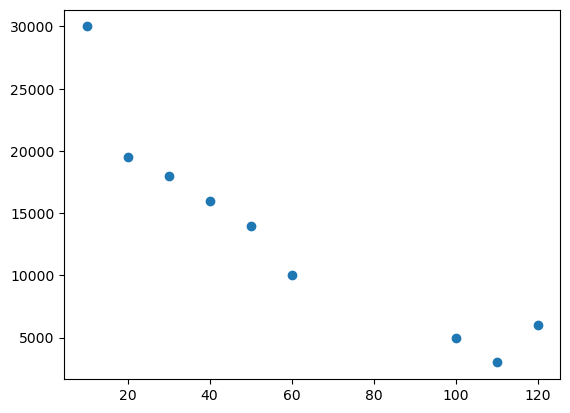

In [34]:
import matplotlib.pyplot as plt
import numpy as np
#使用天數
days = [10,20,30,40,50,60,100,110,120]
#二手價格
prices = [30000,19500,18000,16000,14000,10000,5000,3000,6000]

#散佈圖
plt.scatter(days, prices)

#顯示圖表
plt.show()

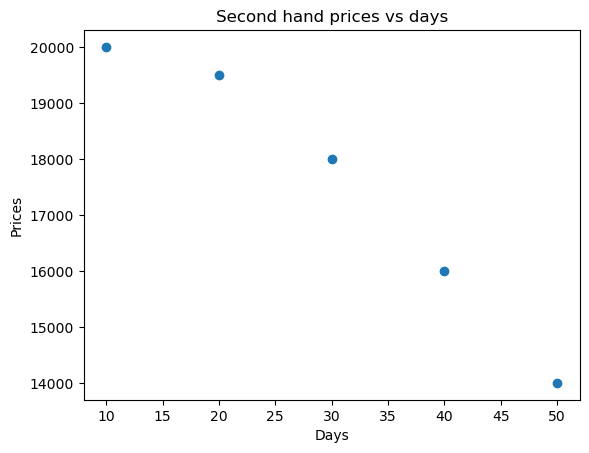

In [35]:
#加上圖表標題跟x, y軸小標

#使用天數
days = [10,20,30,40,50]
#二手價格
prices = [20000,19500,18000,16000,14000]

# 中文需要另外載入字體檔，先不討論
plt.title('Second hand prices vs days')
plt.xlabel('Days')
plt.ylabel('Prices')

#散佈圖
plt.scatter(days, prices)
#顯示圖表
plt.show()

==============  

##  折線圖

使用上一個範例的手機價格 - 天數資料，但改由折線圖 (plot) 來呈現！

+ 修改數字，看看圖表有沒有改變呢？
+ 注意哪些參數不一樣？

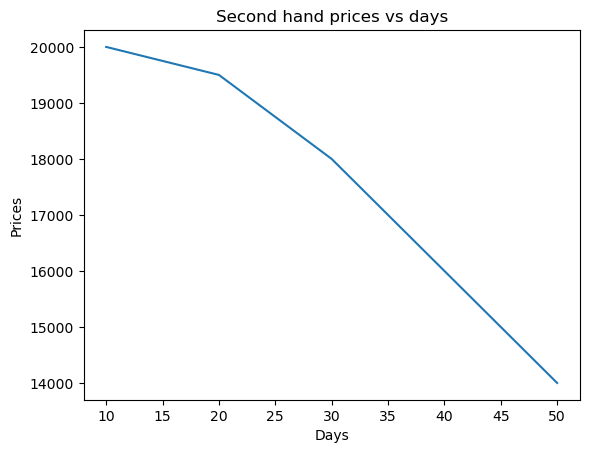

In [33]:
#使用天數
days = [10,20,30,40,50]
#二手價格
prices = [20000,19500,18000,16000,14000]

plt.title('Second hand prices vs days')
plt.xlabel('Days')
plt.ylabel('Prices')

#折線圖
plt.plot(days, prices)
#顯示圖表
plt.show()

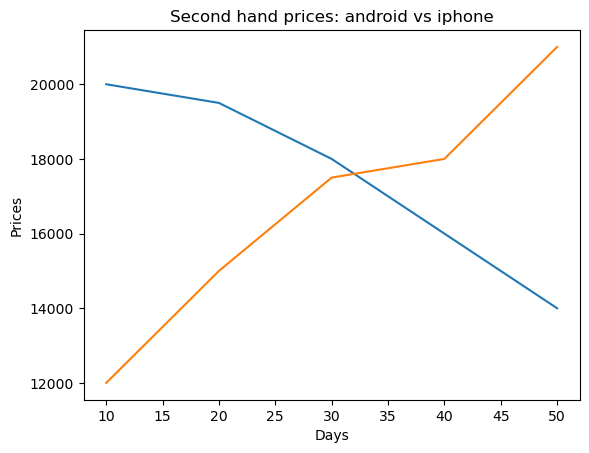

In [36]:
# 同一張圖中顯示兩條線

#使用天數
days = [10,20,30,40,50]
#days2 = [60,70,80,90,100]
#二手價格
prices_android = [20000,19500,18000,16000,14000]
prices_iphone = [12000,15000,17500,18000,21000]

plt.title('Second hand prices: android vs iphone')
plt.xlabel('Days')
plt.ylabel('Prices')

#折線圖 x1,y1 x2, y2. 要加入多少筆資料都可以
#未指定的情況下都以預設的顏色與
plt.plot(days, prices_android, days, prices_iphone)
#顯示圖表
plt.show()

==============  
## 設定線的顏色跟樣式

1.顏色

可以用簡易標記如下表、用全名、用十六進位的色碼：#FFFFFF、用RGB（255,255,255）  

色碼參考:https://www.w3schools.com/colors/colors_rgb.asp  

+ b -- blue
+ c -- cyan
+ g -- green
+ k -- black
+ m -- magenta
+ r -- red
+ w -- white
+ y -- yellow

2.線的樣式
<pre>
-     實線  

--     用線做的虛線  

-.     線點交錯  

:      用點做的虛線
</pre>

+ 試著改變線的顏色跟樣式吧！

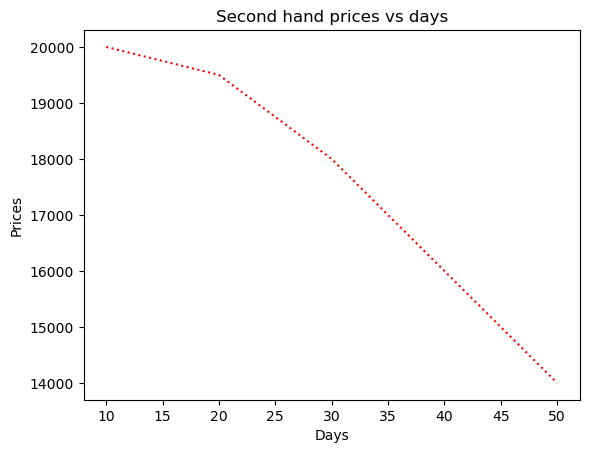

In [37]:
#使用天數
days = [10,20,30,40,50]
#二手價格
prices = [20000,19500,18000,16000,14000]

plt.title('Second hand prices vs days')
plt.xlabel('Days')
plt.ylabel('Prices')

##########改變顏色及樣式###########
#plt.plot(days, prices,'#8782b4')
#FF
plt.plot(days, prices,'r:')
#################################

#顯示圖表
plt.show()